# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
from scipy import stats 
import seaborn as sns 
import math
import pyemma

# Data Dir

In [2]:
data_dir = 'raw_data_holo'

# Collect Data

In [3]:
def data_collect(directory, phs, sstage, lstage):
    stages = [x for x in range(sstage, lstage+1)]
    data = []
    for n, ph in enumerate(phs):
        data_sub = []
        for i in stages:
            with open('{}/pH_{}_stage_{}.dat'.format(directory, ph, i), 'r') as f:
                for line in f:
                    if '#' not in line:
                        split_line = re.split('\s+', line)
                        split_line = split_line[:-1]
                        data_sub.append([np.float(x) for x in split_line])
        data.append(data_sub)
    return data

In [6]:
phs = [4.0]
num = 0 # which pH to plot
raw_data = data_collect(data_dir, phs, 21, 42)

# Make Plots

In [7]:
ph=phs[num]
xs = [x[0] for x in raw_data[num]]
ys = [y[1] for y in raw_data[num]]

# Pyemma Plot

## With Labels

In [8]:
import matplotlib.ticker as ticker
ANGSTROM = "Å"

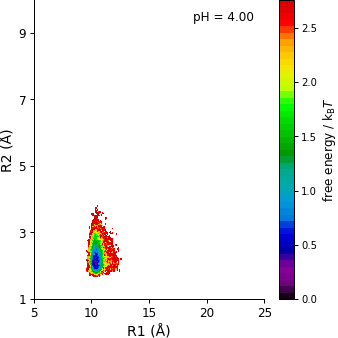

In [14]:
fig, ax, misc = pyemma.plots.plot_free_energy(xs, ys, weights=None, nbins=100, ncontours=50, offset=-1, avoid_zero_count=False, minener_zero=True, kT=0.593, vmin=0, vmax=3, cmap='nipy_spectral', cbar=True, cbar_label='free energy / kT', cax=None, levels=None, legacy=False, ncountours=None, cbar_orientation='vertical')
#ax.set_title('pH = 1.00')
ax.legend(['pH = {0:0.2f}'.format(ph)], loc='upper right', fontsize = 12, frameon = False)
fig.set_size_inches(5, 5)

#ax.hlines(16, 2, 16, color='Black')
#ax.vlines(11, 4, 30, color='Black')

ax.set_xlabel('R1 (%s)' % ANGSTROM, fontsize = 14, style = 'normal')
ax.set_ylabel('R2 (%s)' % ANGSTROM, fontsize = 14, style = 'normal')

ax.set_xlim(5, 25)
ax.set_xticks([5, 10, 15, 20, 25])
ax.set_ylim(1, 10)
ax.set_yticks([1, 3, 5, 7, 9])

ax.tick_params(axis='both', which='major', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(4))

misc['cbar'].set_ticks(np.linspace(0, 12, 25))
misc['cbar'].set_label(r'free energy / $\mathrm{k}_\mathrm{B}T$',size=12)
plt.tight_layout()
#plt.savefig("pyemma_fes.png", dpi=360, transparent=False)

## Without Labels

In [10]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

In [11]:
ink_x = 1.9 # 1.9 use 2 for colorbar
ink_y = 1.4 # 1.6 use 2 for colorbar

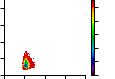

In [13]:
fig, ax, misc = pyemma.plots.plot_free_energy(xs, ys, weights=None, nbins=100, ncontours=100, offset=-1, avoid_zero_count=False, minener_zero=True, kT=0.593, vmin=0, vmax=3, cmap='nipy_spectral', cbar=True, cbar_label='free energy / kT', cax=None, levels=None, legacy=False, ncountours=None, cbar_orientation='vertical')
fig.set_size_inches(ink_x, ink_y)

# Add Box 
#ax.hlines(7.423, 5.889, 7.5, linewidth=1, color='Black')
#ax.hlines(12, 5.889, 7.5, linewidth=1, color='Black')
#ax.vlines(5.889, 7.423, 12, linewidth=1, color='Black')
#ax.vlines(7.5, 7.423, 12, linewidth=1, color='Black')

# plot details
# Y-Axis 
ax.set_ylim(1, 10)
ax.set_yticks([1, 3, 5, 7, 9])
#ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(labelleft=False)
# X-Axis
ax.set_xlim(5, 25)
ax.set_xticks([5, 10, 15, 20, 25])
#ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(labelbottom=False)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

misc['cbar'].set_ticks(np.linspace(0, 12, 25))
misc['cbar'].set_ticklabels(['', '', '', '', '', ''])
misc['cbar'].set_label(' ')

plt.tight_layout()
plt.savefig("plots/fes_holo_pH_{}.png".format(ph), dpi=360, transparent=True)